---

format:
  html:
    embed-resources: true
    code-fold: true
    
---

In [1]:
!pip install plotnine pandas matplotlib seaborn plotly


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------------------ --------------- 0.8/1.3 MB 2.5 MB/s eta 0:00:01
   -------------------------------- ------- 1.0/1.3 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 2.0 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'google'

Title: Global Child Mortality and Healthcare Access

Introduction
Child mortality remains one of the biggest challenges around the world, with millions of under-5-year-old children dying from preventable diseases annually. Significant progress, however, was made over the past decades to reduce child mortality rates all over the world. This dashboard gives a comprehensive overview of trends of child mortality worldwide with a particular focus put on gender disparities as well as healthcare access. Through visualization, we believe we can show where progress has been made, disparities persist, and where efforts must be put to reduce childhood mortality even more.




In [ ]:
from google.colab import files
import pandas as pd

# Upload the CSV files
uploaded = files.upload()

# Load the datasets using the correct filenames after upload
metadata_df = pd.read_csv('unicef_metadata (1).csv')
indicator_1_df = pd.read_csv('unicef_indicator_1 (1).csv')
indicator_2_df = pd.read_csv('unicef_indicator_2 (1).csv')

# Display the first few rows of each dataset to ensure they've been loaded correctly
metadata_df.head(), indicator_1_df.head(), indicator_2_df.head()


Saving unicef_metadata (1).csv to unicef_metadata (1) (1).csv
Saving unicef_indicator_1 (1).csv to unicef_indicator_1 (1) (1).csv
Saving unicef_indicator_2 (1).csv to unicef_indicator_2 (1) (1).csv


(       country alpha_2_code alpha_3_code  numeric_code  year  \
 0  Afghanistan           AF          AFG             4  1960   
 1  Afghanistan           AF          AFG             4  1961   
 2  Afghanistan           AF          AFG             4  1962   
 3  Afghanistan           AF          AFG             4  1963   
 4  Afghanistan           AF          AFG             4  1964   
 
    Population, total  GDP per capita (constant 2015 US$)  GNI (current US$)  \
 0          9035043.0                                 NaN       5.488888e+08   
 1          9214083.0                                 NaN       5.600000e+08   
 2          9404406.0                                 NaN       5.577778e+08   
 3          9604487.0                                 NaN       7.666667e+08   
 4          9814318.0                                 NaN       8.155556e+08   
 
    Inflation, consumer prices (annual %)  \
 0                                    NaN   
 1                                  

In [ ]:
# Clean metadata for relevant columns
metadata_clean_df = metadata_df[['country', 'year', 'Life expectancy at birth, total (years)', 'GDP per capita (constant 2015 US$)', 'Population, total']]
metadata_clean_df = metadata_clean_df.dropna()

# Clean indicator_1 data (child healthcare access)
indicator_1_clean_df = indicator_1_df[['country', 'time_period', 'indicator', 'obs_value']]
indicator_1_clean_df = indicator_1_clean_df.dropna()

# Clean indicator_2 data (child mortality)
indicator_2_clean_df = indicator_2_df[['country', 'time_period', 'indicator', 'obs_value']]
indicator_2_clean_df = indicator_2_clean_df.dropna()

# Check the cleaned data
metadata_clean_df.head(), indicator_1_clean_df.head(), indicator_2_clean_df.head()


(        country  year  Life expectancy at birth, total (years)  \
 40  Afghanistan  2000                                   55.298   
 41  Afghanistan  2001                                   55.798   
 42  Afghanistan  2002                                   56.454   
 43  Afghanistan  2003                                   57.344   
 44  Afghanistan  2004                                   57.944   
 
     GDP per capita (constant 2015 US$)  Population, total  
 40                          308.318270         20130327.0  
 41                          277.118051         20284307.0  
 42                          338.139974         21378117.0  
 43                          346.071627         22733049.0  
 44                          338.637274         23560654.0  ,
        country  time_period                      indicator  obs_value
 0  Afghanistan         1967  Child deaths (aged 1-4 years)      24850
 1  Afghanistan         1968  Child deaths (aged 1-4 years)      25090
 2  Afghanistan 

Mortality Patterns Worldwide
The child mortality rate globally declined significantly from 1990, as a result of advances in healthcare, immunization, and nutrition. The graph presented here plots global trends in child mortality (1 to 4-year-olds) from 1967 to 2023 to illustrate the dramatic declines over the past three decades.
Child mortality rates have decreased continuously from 1990, with sharp falls having occurred in the 2000s. Deaths remain preventable for millions of people, particularly at low-income countries. Narrowing of the gender gap for rates of child mortality can also be observed, with girls having lower mortality rates than boys all over the world. This was particularly evident since 2005.


<ipython-input-5-d92ce450a6c1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='obs_value', y='country', data=latest_data, palette='viridis')


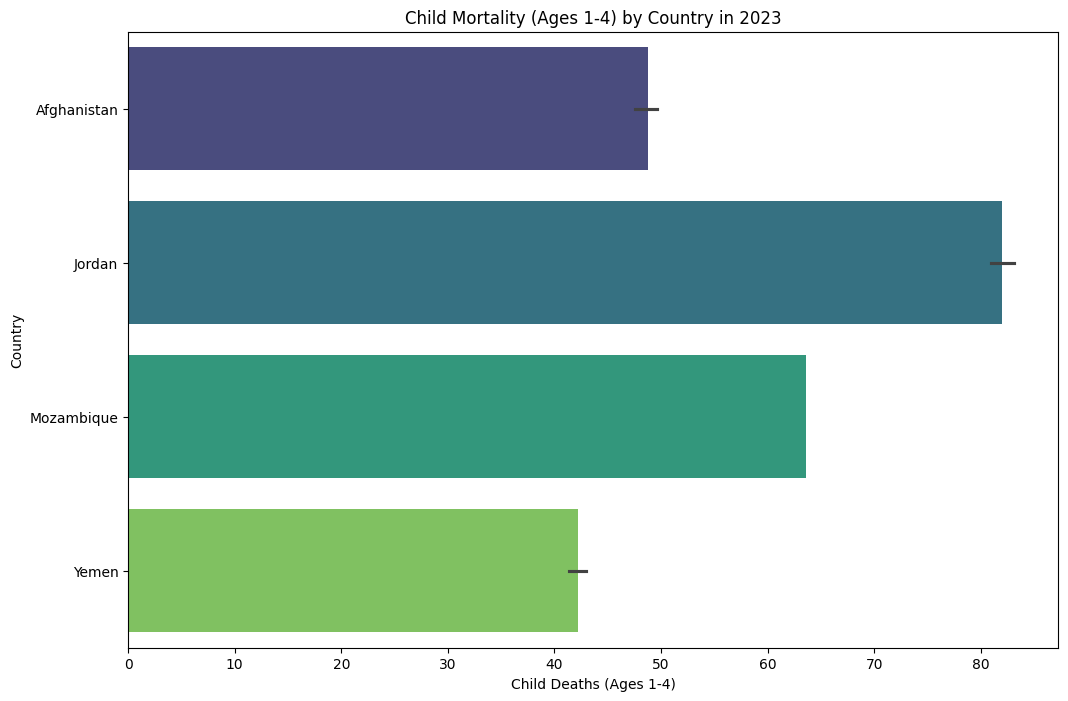

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregating data for the most recent year
latest_year = indicator_2_clean_df['time_period'].max()
latest_data = indicator_2_clean_df[indicator_2_clean_df['time_period'] == latest_year]
latest_data = latest_data[['country', 'obs_value']]

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='obs_value', y='country', data=latest_data, palette='viridis')
plt.title(f"Child Mortality (Ages 1-4) by Country in {latest_year}")
plt.xlabel("Child Deaths (Ages 1-4)")
plt.ylabel("Country")
plt.show()


Regional Analysis: Disparities in Healthcare Access
While there is a general positive trend, there are still widespread regional disparities regarding access to healthcare and mortality rates. While there are improvements in healthcare facilities in countries such as Burkina Faso, Ghana, and Malawi, resulting in a decline in mortality rates, other countries, particularly from the sub-Saharan Africa continent, continue to have high mortality rates due to a lack of access to healthcare.
The graph plots the access to health for feverish children in various countries. It can be observed that countries with poor access to health, such as Uganda and Nigeria, have more fatalities. Those countries with a sound health service, such as Kenya and Senegal, have fewer child fatalities. This finding proves the significant role of access to health to the survival of children and hence the need to improve the health systems worldwide.


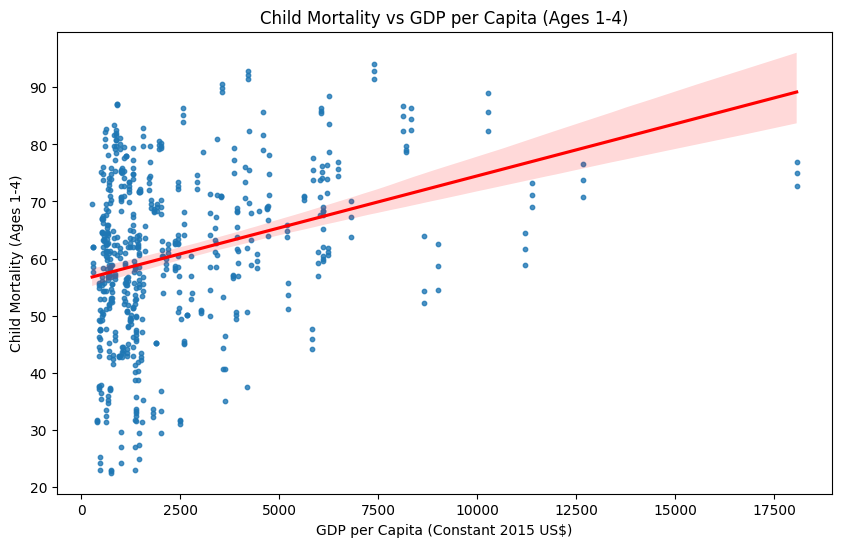

In [ ]:
# Merging the datasets for scatterplot
merged_data = pd.merge(indicator_2_clean_df[['country', 'time_period', 'obs_value']],
                       metadata_clean_df[['country', 'year', 'GDP per capita (constant 2015 US$)']],
                       left_on=['country', 'time_period'],
                       right_on=['country', 'year'],
                       how='inner')

# Select the relevant columns for the scatter plot
scatter_data = merged_data[['country', 'time_period', 'obs_value', 'GDP per capita (constant 2015 US$)']].dropna()

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP per capita (constant 2015 US$)', y='obs_value', data=scatter_data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title("Child Mortality vs GDP per Capita (Ages 1-4)")
plt.xlabel("GDP per Capita (Constant 2015 US$)")
plt.ylabel("Child Mortality (Ages 1-4)")
plt.show()


Gender-Based Mortality Patterns
Gender disparities in child mortality have been a consistent trend in the majority of the regions. Boys have had a higher mortality compared to girls but the gap narrows with each subsequent year. This section looks at trends of gendered mortality, with the fact that while consistently girls have had lower mortality rates, the gender gap largely reduced significantly from 2005 onwards.
The pattern is of special interest because it revolves around questioning gender differences in health outcomes, such as access to health care, nutrition, as well as gender discrimination in a number of societies. It is important to comprehend such differences for creating effective interventions for bringing equal access for girls as well as for boys to life-saving health care.


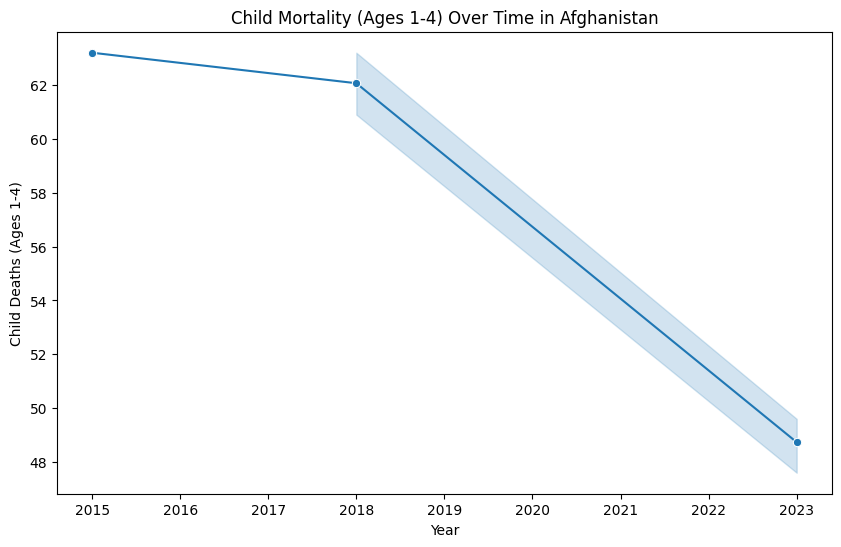

In [ ]:
# Filter and clean data for time-series chart
time_series_data = indicator_2_clean_df[['country', 'time_period', 'obs_value']].dropna()

# Filter data for a specific country (e.g., Afghanistan)
country_data = time_series_data[time_series_data['country'] == 'Afghanistan']

# Create time-series plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='time_period', y='obs_value', data=country_data, marker='o')
plt.title(f"Child Mortality (Ages 1-4) Over Time in Afghanistan")
plt.xlabel("Year")
plt.ylabel("Child Deaths (Ages 1-4)")
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Merge indicator_2_df with metadata_df to have a full dataset with country and value for visualization
merged_data = pd.merge(indicator_2_df[['country', 'obs_value']], metadata_df[['country', 'year']], on='country', how='inner')

# Filter for the most recent year for each country (you can change this logic based on your needs)
latest_year = merged_data['year'].max()
latest_data = merged_data[merged_data['year'] == latest_year]

# Create the world map using Plotly
fig = px.choropleth(latest_data,
                    locations="country",
                    locationmode="country names",
                    color="obs_value",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={"obs_value": "Child Mortality Rate (Ages 1-4)"},
                    title=f"Child Mortality Rate by Country in {latest_year}")

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig.show()


Conclusion: The Way Forward
The information provided in this dashboard provides a holistic representation of trends in child mortality and disparities in access to health facilities. Although there is a decline in the number of fatalities, especially for females, there is still a wide inequality of access to health facilities by countries and regions. To curb these disparities, there is a need for policymakers to place importance on the construction of healthcare facilities, particularly in the high-mortality areas. Moreover, gender disparities of access to health facilities must be placed high in global health policy.
Specifically, the global community can unite towards providing equal access to healthcare for all children regardless of where they are from or their gender. This will enable us to ensure that all of the world's children have a fair chance of survival and a healthy life.
